In [96]:
import numpy as np
import matplotlib.pyplot as plt

def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

def forward_diff(f, h):
    return (f[1:] - f[:-1]) / h

def central_diff(f, h):
    return (f[2:] - f[:-2]) / h

alpha = 0.3
N = 10
h = 1 / N
delta = 0.01
a = 0
b = 4

A = alpha / h**2 * \
    (tridiag(np.ones(N-1),
             [1] + list((-2 - h**2)*np.ones(N-2)) + [1],
             np.ones(N-1)))
f = np.exp(np.linspace(a, b, N))
f += np.random.choice([-1, 1], f.shape)

u = np.linalg.solve(A, f)

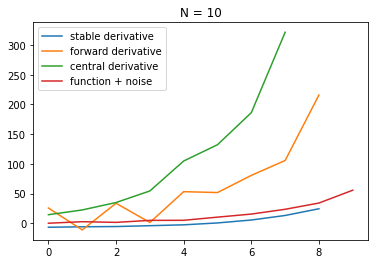

In [97]:
plt.plot(forward_diff(u, h), label='stable derivative')
plt.plot(forward_diff(f, h), label='forward derivative')
plt.plot(central_diff(f, h), label='central derivative')
plt.plot(f, label='function + noise')
plt.legend()
plt.title('N = ' + str(N))
plt.savefig('ex3.png')